## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [5]:
# Answer to the challenge
query_results = pd.read_csv('/Users/lovely/Documents/Udemy/100_DaysOfProgramming/073_Day/QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [6]:
head_qr = query_results.head()
tail_qr = query_results.tail()
print(f'Head:\n {head_qr}\nTail:\n{tail_qr}')

Head:
                   DATE         TAG  POSTS
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    162
3  2008-08-01 00:00:00           c     85
4  2008-08-01 00:00:00      python    124
Tail:
                     DATE    TAG  POSTS
1986  2020-07-01 00:00:00      r   5694
1987  2020-07-01 00:00:00     go    743
1988  2020-07-01 00:00:00   ruby    775
1989  2020-07-01 00:00:00   perl    182
1990  2020-07-01 00:00:00  swift   3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [10]:
# info_qr = query_results.info()
print(f'The dimenstions of the table are \'{query_results.shape}\'')


The dimenstions of the table are '(1991, 3)'


**Challenge**: Count the number of entries in each column of the dataframe

In [11]:
query_results.count() 

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [15]:
query_results.groupby('TAG').sum()
# query_results.loc()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [16]:
query_results.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [20]:
print(f'This is the the square bracket notation \'{query_results['DATE'][1]}\'')
print(f'This is the the dot bracket notation \'{query_results.DATE[1]}\'')
query_results.DATE = pd.to_datetime(query_results.DATE) # This is how we change string notation to pandas datetime value

This is the the square bracket notation '2008-08-01 00:00:00'
This is the the dot bracket notation '2008-08-01 00:00:00'


In [40]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df
# pivoted_df = test_df.pivot(index='Age', columns= 'Actor',values='Power')
# print(pivoted_df)

# Can you pivot the df DataFrame so that each row is a date and each column is a programming language? Store the result under a variable called reshaped_df. 
pivoted_df = query_results.pivot_table(index='DATE', columns='TAG', values='POSTS')
pivoted_df.fillna(0, inplace=True)
print(pivoted_df.isna().values.any())
print(pivoted_df)
# Examine the dimensions of the reshaped DataFrame. How many rows does it have? How many columns?
print(f'dimensions of the Pivoted Table are {pivoted_df.shape}')
# Examine the head and the tail of the DataFrame. What does it look like?
print(f'The head of the pivoted table {pivoted_df.head()}')
print(f'The tail of the pivoted table {pivoted_df.tail()}')
# Print out the column names.
print(f'The column names {pivoted_df.columns}')
# Count the number of entries per column.
print(f'The numbet of entried per colunn {pivoted_df.count()}')


False
TAG         assembly       c       c#     c++  delphi     go     java  \
DATE                                                                    
2008-07-01       0.0     0.0      3.0     0.0     0.0    0.0      0.0   
2008-08-01       8.0    85.0    511.0   164.0    14.0    0.0    222.0   
2008-09-01      28.0   321.0   1649.0   755.0   105.0    0.0   1137.0   
2008-10-01      15.0   303.0   1989.0   811.0   112.0    0.0   1153.0   
2008-11-01      17.0   259.0   1730.0   735.0   141.0    0.0    958.0   
...              ...     ...      ...     ...     ...    ...      ...   
2020-03-01     317.0  2670.0   8954.0  5107.0   181.0  719.0  13253.0   
2020-04-01     406.0  3472.0  10042.0  6820.0   250.0  887.0  15377.0   
2020-05-01     386.0  3602.0   9923.0  7063.0   221.0  826.0  14711.0   
2020-06-01     363.0  2757.0   9064.0  6161.0   214.0  765.0  13015.0   
2020-07-01     298.0  2294.0   9145.0  5756.0   212.0  743.0  12723.0   

TAG         javascript   perl     php   pyth

In [5]:
# All DONE UP ABOVE 

## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

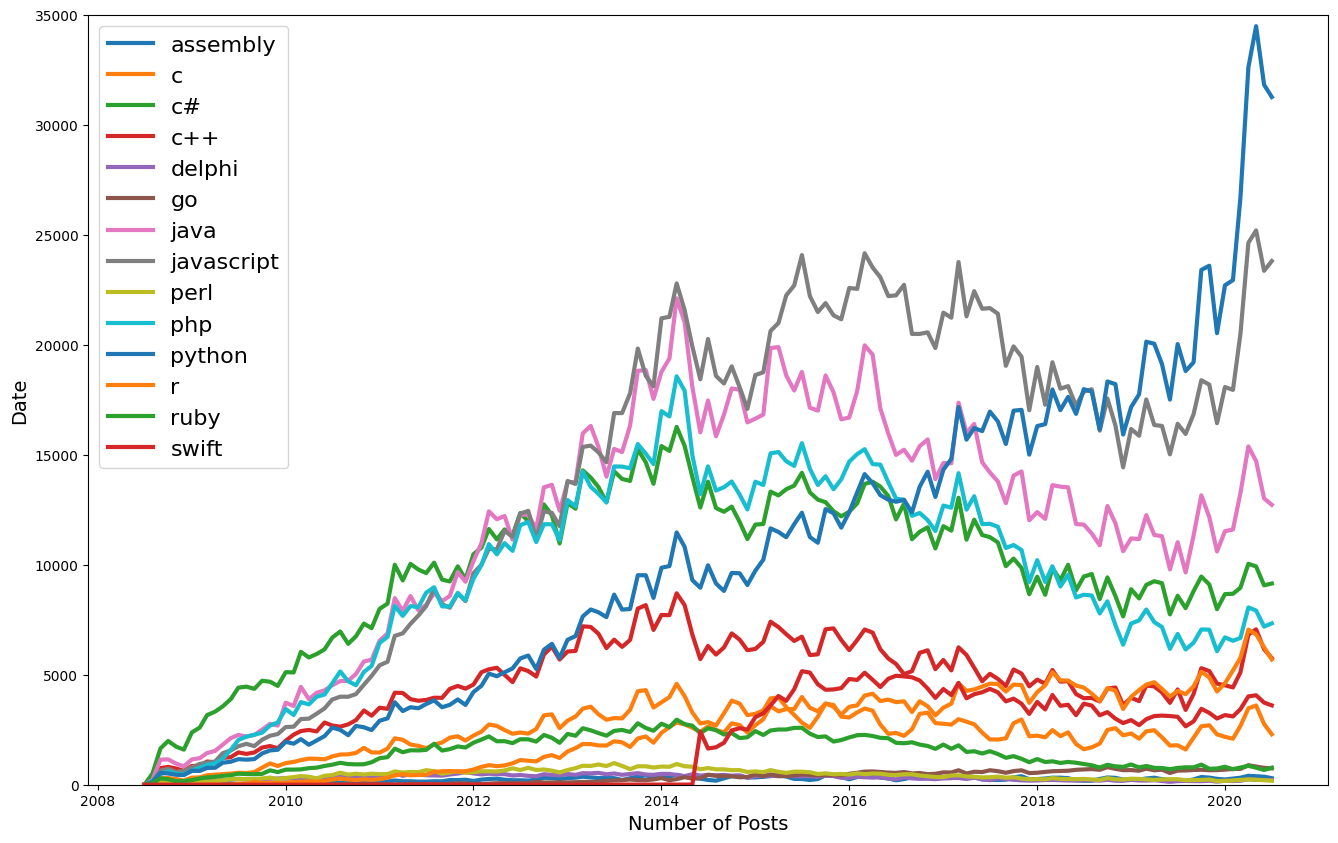

In [57]:


plt.figure(figsize=(16,10))
plt.ylabel('Date', fontsize=14)
plt.xlabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in pivoted_df.columns:
    plt.plot(pivoted_df.index, pivoted_df[column], linewidth=3, label=pivoted_df[column].name)
plt.legend(fontsize=16)



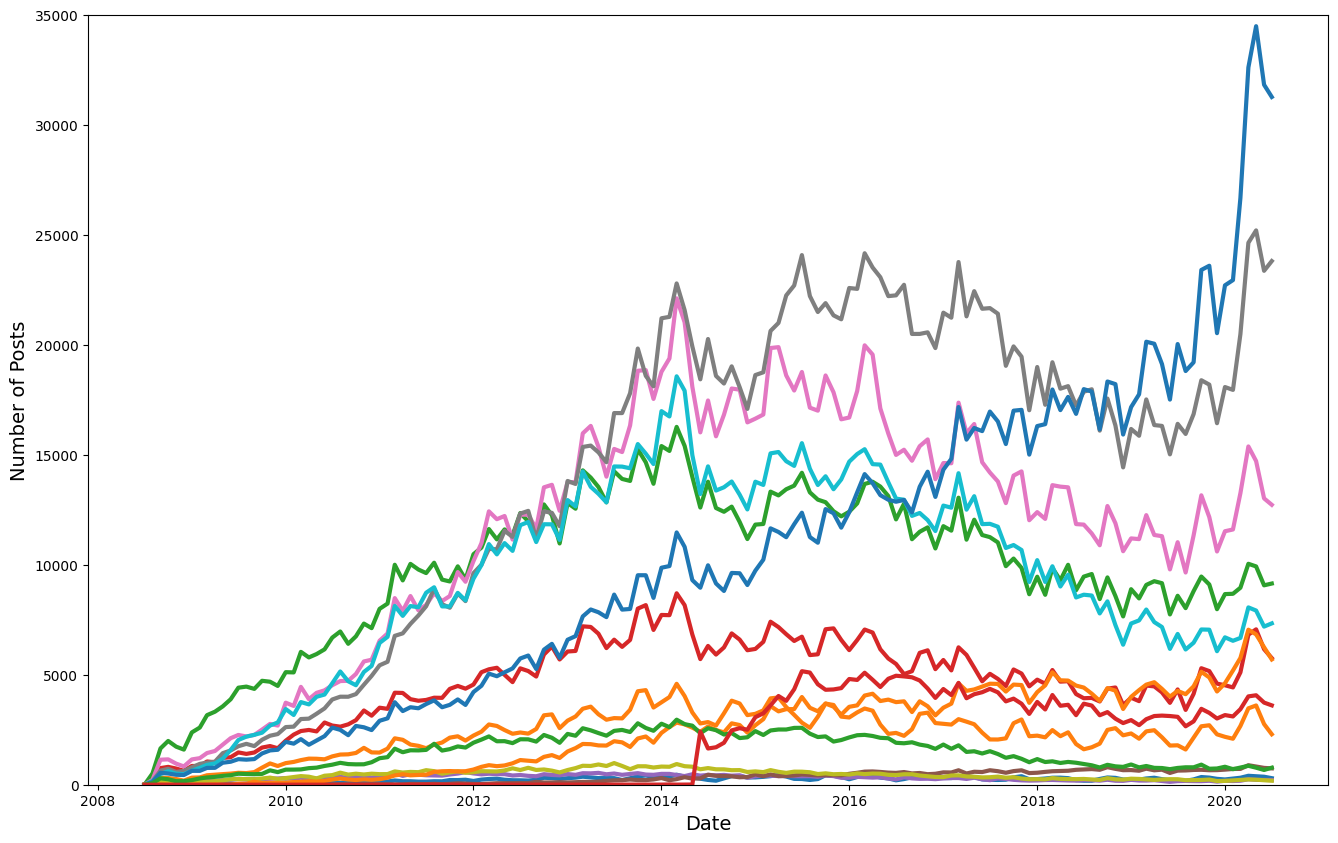

In [58]:
rolling_df = pivoted_df.rolling(window=6).mean()
plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in pivoted_df.columns:
    plt.plot(pivoted_df.index, pivoted_df[column], linewidth=3, label=pivoted_df[column].name)
plt.legend(fontsize=16)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 